In [55]:
import pandas as pd
import seaborn as sns

In [56]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df_vendas = pd.DataFrame(dados_vendas)
df_vendas['mes_num'] = range(1, 13)

In [57]:
# Verificando estruturas dos dados
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mes      12 non-null     object
 1   vendas   12 non-null     int64 
 2   mes_num  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [59]:
# Modelo 1
X = df_vendas[['mes_num']] # Para o uso ser do tipo dataframe, por isso o uso dos [[]]
y = df_vendas['vendas']

# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [60]:
# Treinar o algoritmo de regressão linear
model_1 = LinearRegression().fit(X_train, y_train)

In [61]:
# Gerando previsões do conjunto de testes do modelo 1
y_pred = model_1.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'r^2 Score: {r2}')

Mean Squared Error: 42.85714285714289
r^2 Score: 0.9813215492845836


In [62]:
# Exibir os coeficientes do modelo
print(f'Intercepto: {model_1.intercept_}')
print(f'Coeficiente: {model_1.coef_}')

Intercepto: 2019.047619047619
Coeficiente: [109.52380952]


In [63]:
# Prevendo as vendas para o mês de dezembro
previsao_dezembro = model_1.predict([[12]])
round(previsao_dezembro[0], 2)

c:\Users\Pedro\.virtualenvs\AIDeveloper-IJJLBaxx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(3333.33)

In [64]:
import matplotlib.pyplot as plt


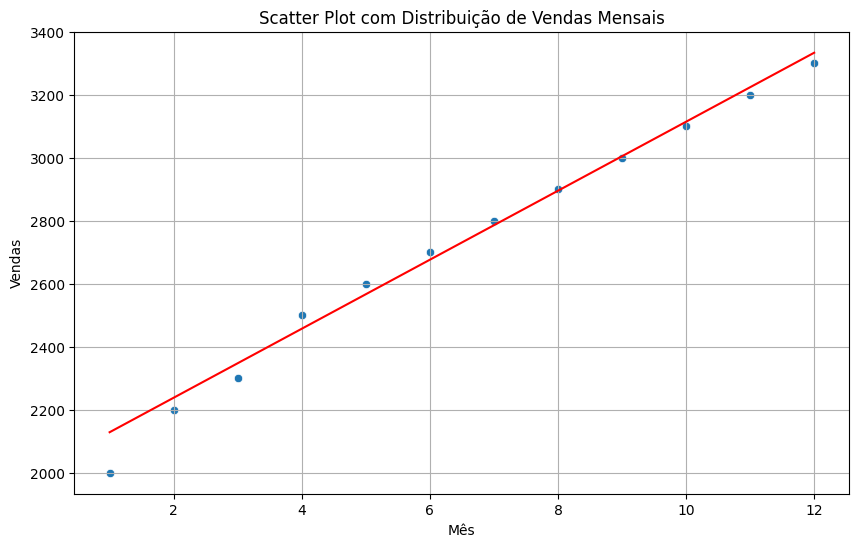

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_num', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_num'], model_1.predict(df_vendas[['mes_num']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()